In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download and load the dataset
import kagglehub

print("STEP 1: DATASET LOADING")

# Download the dataset
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
print(f"Dataset downloaded to: {path}")

# Load the dataset
df = pd.read_csv(path + "/weatherAUS.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

STEP 1: DATASET LOADING
Using Colab cache for faster access to the 'weather-dataset-rattle-package' dataset.
Dataset downloaded to: /kaggle/input/weather-dataset-rattle-package
Dataset shape: (145460, 23)
Columns: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Step 2: Data Exploration
print("="*60)
print("STEP 2: DATA EXPLORATION")
print("="*60)

# Display basic information
print("Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

# Check missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} ({missing/len(df)*100:.2f}%)")

# Target variable distribution
print("\nTarget variable distribution:")
target_counts = df['RainTomorrow'].value_counts()
print(target_counts)
print(f"Class balance: {target_counts.values[1]/(target_counts.values[0]+target_counts.values[1])*100:.2f}% Rain")


STEP 2: DATA EXPLORATION
Dataset Info:
Number of rows: 145460
Number of columns: 23

First 5 rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   


In [ ]:
# Step 3: Data Preprocessing
print("="*60)
print("STEP 3: DATA PREPROCESSING")
print("="*60)

# Create a copy for preprocessing
df_processed = df.copy()

# Define feature sets
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Handle missing values in numerical features
print("Handling missing values...")
for feature in numerical_features:
    if feature in df_processed.columns:
        median_val = df_processed[feature].median()
        df_processed[feature].fillna(median_val, inplace=True)
        print(f"Filled {feature} missing values with median: {median_val:.2f}")

# Encode categorical features
print("\nEncoding categorical features...")
label_encoders = {}
for feature in categorical_features:
    if feature in df_processed.columns:
        le = LabelEncoder()
        df_processed[feature] = df_processed[feature].astype(str)
        df_processed[feature] = le.fit_transform(df_processed[feature])
        label_encoders[feature] = le
        print(f"Encoded {feature}: {len(le.classes_)} unique classes")

# Encode target variable
print("\nEncoding target variable...")
target_le = LabelEncoder()
df_processed['RainTomorrow'] = df_processed['RainTomorrow'].astype(str)
df_processed['RainTomorrow'] = target_le.fit_transform(df_processed['RainTomorrow'])
print(f"Target classes: {target_le.classes_}")

# Remove rows with missing target values
df_processed = df_processed.dropna(subset=['RainTomorrow'])

# Prepare features and target
feature_columns = [col for col in df_processed.columns if col not in ['Date', 'RainTomorrow']]
X = df_processed[feature_columns]
y = df_processed['RainTomorrow']

print(f"\nFinal preprocessing results:")
print(f"Dataset shape after preprocessing: {df_processed.shape}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")


STEP 3: DATA PREPROCESSING
Handling missing values...
Filled MinTemp missing values with median: 12.00
Filled MaxTemp missing values with median: 22.60
Filled Rainfall missing values with median: 0.00
Filled Evaporation missing values with median: 4.80
Filled Sunshine missing values with median: 8.40
Filled WindGustSpeed missing values with median: 39.00
Filled WindSpeed9am missing values with median: 13.00
Filled WindSpeed3pm missing values with median: 19.00
Filled Humidity9am missing values with median: 70.00
Filled Humidity3pm missing values with median: 52.00
Filled Pressure9am missing values with median: 1017.60
Filled Pressure3pm missing values with median: 1015.20
Filled Cloud9am missing values with median: 5.00
Filled Cloud3pm missing values with median: 5.00
Filled Temp9am missing values with median: 16.70
Filled Temp3pm missing values with median: 21.10

Encoding categorical features...
Encoded Location: 49 unique classes
Encoded WindGustDir: 17 unique classes
Encoded WindDi

In [ ]:
# Step 4: Train-Test Split
print("="*60)
print("STEP 4: TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set class distribution:")
train_counts = pd.Series(y_train).value_counts()
for i, count in enumerate(train_counts):
    print(f"  Class {target_le.classes_[i]}: {count} ({count/len(y_train)*100:.2f}%)")


STEP 4: TRAIN-TEST SPLIT
Training set size: 101822 samples
Test set size: 43638 samples
Training set class distribution:
  Class No: 77221 (75.84%)
  Class Yes: 22314 (21.91%)
  Class nan: 2287 (2.25%)


In [ ]:
# Step 5: Decision Tree Implementation
print("="*60)
print("STEP 5: DECISION TREE CLASSIFIER")
print("="*60)

# Initialize and train Decision Tree
dt_classifier = DecisionTreeClassifier(
    criterion='gini',           # Split criterion
    max_depth=10,              # Maximum depth to prevent overfitting
    min_samples_split=20,      # Minimum samples to split
    min_samples_leaf=10,       # Minimum samples in leaf
    random_state=42
)

print("Training Decision Tree classifier...")
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print(f"\nDecision Tree Results:")
print(f"Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=target_le.classes_))

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("\nDecision Tree Confusion Matrix:")
print("Predicted:   No    Yes")
print(f"Actual No:  {dt_cm[0,0]:4d}  {dt_cm[0,1]:4d}")
print(f"Actual Yes: {dt_cm[1,0]:4d}  {dt_cm[1,1]:4d}")

STEP 5: DECISION TREE CLASSIFIER
Training Decision Tree classifier...

Decision Tree Results:
Accuracy: 0.8274 (82.74%)
Precision: 0.8147
Recall: 0.8274
F1-Score: 0.8119

Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.95      0.90     33095
         Yes       0.71      0.45      0.55      9563
         nan       0.71      0.41      0.52       980

    accuracy                           0.83     43638
   macro avg       0.76      0.60      0.66     43638
weighted avg       0.81      0.83      0.81     43638


Decision Tree Confusion Matrix:
Predicted:   No    Yes
Actual No:  31394  1629
Actual Yes: 5167  4306


In [ ]:
# Step 6: Naive Bayes Implementation
print("="*60)
print("STEP 6: NAIVE BAYES CLASSIFIER")
print("="*60)

# Initialize and train Naive Bayes
nb_classifier = GaussianNB(var_smoothing=1e-9)

print("Training Naive Bayes classifier...")
nb_classifier.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print(f"\nNaive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions, target_names=target_le.classes_))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
print("\nNaive Bayes Confusion Matrix:")
print("Predicted:   No    Yes")
print(f"Actual No:  {nb_cm[0,0]:4d}  {nb_cm[0,1]:4d}")
print(f"Actual Yes: {nb_cm[1,0]:4d}  {nb_cm[1,1]:4d}")


STEP 6: NAIVE BAYES CLASSIFIER
Training Naive Bayes classifier...

Naive Bayes Results:
Accuracy: 0.7880 (78.80%)
Precision: 0.7973
Recall: 0.7880
F1-Score: 0.7921

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.85      0.86     33095
         Yes       0.55      0.60      0.58      9563
         nan       0.41      0.53      0.46       980

    accuracy                           0.79     43638
   macro avg       0.61      0.66      0.63     43638
weighted avg       0.80      0.79      0.79     43638


Naive Bayes Confusion Matrix:
Predicted:   No    Yes
Actual No:  28133  4472
Actual Yes: 3568  5736


In [ ]:
# Step 7: Model Comparison
print("="*60)
print("STEP 7: MODEL COMPARISON")
print("="*60)

# Create comparison table
comparison_data = {
    'Algorithm': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, nb_accuracy],
    'Precision': [dt_precision, nb_precision],
    'Recall': [dt_recall, nb_recall],
    'F1-Score': [dt_f1, nb_f1]
}

comparison_df = pd.DataFrame(comparison_data)
print("Performance Comparison:")
print(comparison_df.round(4))

# Determine best model
if dt_accuracy > nb_accuracy:
    best_model = "Decision Tree"
    best_accuracy = dt_accuracy
    accuracy_diff = dt_accuracy - nb_accuracy
else:
    best_model = "Naive Bayes"
    best_accuracy = nb_accuracy
    accuracy_diff = nb_accuracy - dt_accuracy

print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Accuracy Difference: {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")


STEP 7: MODEL COMPARISON
Performance Comparison:
       Algorithm  Accuracy  Precision  Recall  F1-Score
0  Decision Tree    0.8274     0.8147  0.8274    0.8119
1    Naive Bayes    0.7880     0.7973  0.7880    0.7921

Best Model: Decision Tree
Best Accuracy: 0.8274 (82.74%)
Accuracy Difference: 0.0393 (3.93%)


STEP 7: MODEL COMPARISON
Performance Comparison:
       Algorithm  Accuracy  Precision  Recall  F1-Score
0  Decision Tree    0.8274     0.8147  0.8274    0.8119
1    Naive Bayes    0.7880     0.7973  0.7880    0.7921

Best Model: Decision Tree
Best Accuracy: 0.8274 (82.74%)
Accuracy Difference: 0.0393 (3.93%)
STEP 8: CONCLUSIONS AND ANALYSIS
PERFORMANCE ANALYSIS:
----------------------------------------
Dataset Size: 145,460 records
Training Samples: 101,822
Testing Samples: 43,638
Number of Features: 21
Target Classes: 3

ALGORITHM CHARACTERISTICS:
----------------------------------------
Decision Tree:
  + Highly interpretable with clear decision rules
  + Handles both numerical and categorical features well
  + Provides feature importance rankings
  - Prone to overfitting without proper tuning
  - Can be sensitive to small data changes

Naive Bayes:
  + Fast training and prediction
  + Less prone to overfitting
  + Works well with limited training data
  - Assumes feature independen

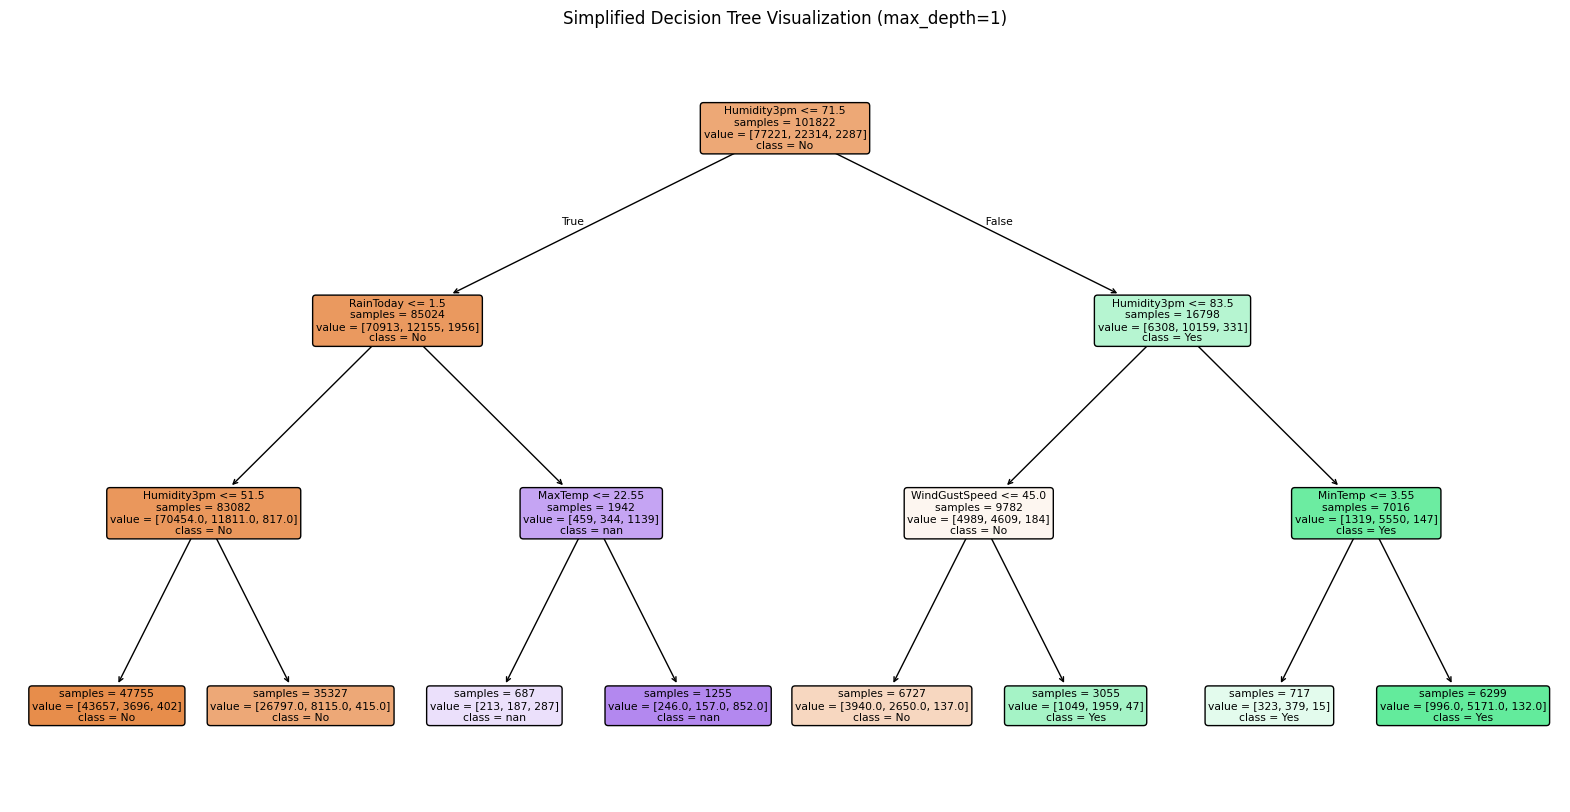

In [ ]:
# Step 7: Model Comparison
print("="*60)
print("STEP 7: MODEL COMPARISON")
print("="*60)

# Create comparison table
comparison_data = {
    'Algorithm': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, nb_accuracy],
    'Precision': [dt_precision, nb_precision],
    'Recall': [dt_recall, nb_recall],
    'F1-Score': [dt_f1, nb_f1]
}

comparison_df = pd.DataFrame(comparison_data)
print("Performance Comparison:")
print(comparison_df.round(4))

# Determine best model
if dt_accuracy > nb_accuracy:
    best_model = "Decision Tree"
    best_accuracy = dt_accuracy
    accuracy_diff = dt_accuracy - nb_accuracy
else:
    best_model = "Naive Bayes"
    best_accuracy = nb_accuracy
    accuracy_diff = nb_accuracy - dt_accuracy

print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Accuracy Difference: {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")

# Step 8: Conclusions and Analysis
print("="*60)
print("STEP 8: CONCLUSIONS AND ANALYSIS")
print("="*60)

print("PERFORMANCE ANALYSIS:")
print("-" * 40)
print(f"Dataset Size: {len(df_processed):,} records")
print(f"Training Samples: {len(X_train):,}")
print(f"Testing Samples: {len(X_test):,}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Target Classes: {len(target_le.classes_)}")

print("\nALGORITHM CHARACTERISTICS:")
print("-" * 40)
print("Decision Tree:")
print("  + Highly interpretable with clear decision rules")
print("  + Handles both numerical and categorical features well")
print("  + Provides feature importance rankings")
print("  - Prone to overfitting without proper tuning")
print("  - Can be sensitive to small data changes")

print("\nNaive Bayes:")
print("  + Fast training and prediction")
print("  + Less prone to overfitting")
print("  + Works well with limited training data")
print("  - Assumes feature independence (may not hold)")
print("  - Less interpretable than decision trees")

print("\nRECOMMENDATIONS:")
print("-" * 40)
if dt_accuracy > nb_accuracy:
    print("• Decision Tree performs better on this dataset")
    print("• The hierarchical nature of weather patterns suits decision trees")
    print("• Feature importance shows which weather factors matter most")
else:
    print("• Naive Bayes performs better on this dataset")
    print("• The probabilistic approach works well for weather prediction")
    print("• Less overfitting risk makes it more generalizable")

print("\nExperiment completed successfully!")
print("="*60)

# Visualizing the Decision Tree for the Best Model
# Determine best model for visualization
if best_model == "Decision Tree":
    print("\nVisualizing the Decision Tree...")

    dt_classifier_simple = DecisionTreeClassifier(
    criterion='gini',           # Split criterion
    max_depth=3,                # Limit the tree depth to 1 level
    min_samples_split=20,       # Minimum samples to split
    min_samples_leaf=10,        # Minimum samples in leaf
    random_state=42
    )

    # Train the model with max_depth=1
    print("Training Decision Tree classifier with max_depth=3...")
    dt_classifier_simple.fit(X_train, y_train)

    # Use the class names from the label encoder for target variable (RainTomorrow)
    class_names = target_le.classes_

    # Visualize the Decision Tree with max_depth=1, showing only the feature names
    plt.figure(figsize=(20, 10))
    plot_tree(dt_classifier_simple,
              filled=True,
              feature_names=feature_columns,  # Only include feature names in the tree
              class_names=class_names,
              rounded=True,
              impurity=False,  # Remove Gini impurity values
              precision=2)  # Show feature names with 2 decimal places (optional)
    plt.title("Simplified Decision Tree Visualization (max_depth=1)")
    plt.show()
